# Analisi Esplorativa: Popolazione Straniera nell'Unione Reno Galliera (2011-2016)

**Autore:** Fatjon Hoxha
**Data:** 2025-04-04
**Fonte Dati:** File `ps.csv` (dati pubblici Emilia Romagna Italia https://www.renogalliera.it/open-data/Dati/popolazione)

## Introduzione

Questo notebook presenta un'analisi esplorativa (EDA) dei dati relativi alla popolazione straniera residente nei comuni dell'Unione Reno Galliera (Argelato, Bentivoglio, Castello d'Argile, Castel Maggiore, Galliera, Pieve di Cento, San Giorgio di Piano, San Pietro in Casale) per il periodo compreso tra il 2011 e il 2016.

**Obiettivo:** L'obiettivo è comprendere le tendenze principali, le distribuzioni geografiche e temporali, la composizione per genere e le principali nazionalità presenti in quest'area. Si vuole ottenere una visione chiara del fenomeno migratorio locale basata sui dati disponibili.

**Metodologia:** Utilizzeremo le librerie Python `pandas` per la manipolazione dei dati, `matplotlib` e `seaborn` per la visualizzazione grafica, e `scikit-learn` per analisi più avanzate come la PCA.

*(Questa analisi si basa su dati pubblici/forniti e si intende come base per una discussione e raccolta di opinioni/interpretazioni).*

## 1. Setup e Import Librerie

Iniziamo importando tutte le librerie necessarie per la nostra analisi. Impostiamo anche alcune opzioni standard per i grafici e per la gestione degli avvisi.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import sys

## 2. Caricamento e Pulizia Dati

In questa sezione, carichiamo il dataset dal file `ps.csv`. Successivamente, eseguiamo le operazioni preliminari di pulizia:
* Controllo e pulizia dei nomi delle colonne (es. rimozione spazi).
* Rimozione di spazi bianchi non necessari dai dati testuali.
* Conversione delle colonne numeriche al formato corretto (gestendo eventuali errori).
* Verifica della presenza di valori mancanti (NaN).

In [4]:
file_path = 'ps.csv' # Assicurati che ps.csv sia accessibile

try:
    df = pd.read_csv(file_path, sep=',', skipinitialspace=True)
    print(f"File '{file_path}' caricato con successo. Righe: {df.shape[0]}, Colonne: {df.shape[1]}")
except FileNotFoundError:
    print(f"ERRORE: Il file '{file_path}' non è stato trovato.")
    # In Jupyter non usiamo sys.exit(), l'esecuzione si ferma qui se c'è errore
    raise # Rilancia l'eccezione per fermare l'esecuzione del notebook
except Exception as e:
    print(f"ERRORE: Si è verificato un problema durante il caricamento: {e}")
    raise

File 'ps.csv' caricato con successo. Righe: 48, Colonne: 15


In [29]:
print("--- Colonne Originali ---")
print(df.columns.tolist()) # .tolist() per una vista più pulita in Jupyter

# Pulisce i nomi delle colonne
df.columns = df.columns.str.strip()

# Corregge lo spazio nel nome colonna
if '2_STATO_ DI_PROVENIENZA' in df.columns:
    df.rename(columns={"2_STATO_ DI_PROVENIENZA": "2_STATO_DI_PROVENIENZA"}, inplace=True)
    print("\nColonna rinominata: '2_STATO_DI_PROVENIENZA'")

print("\n--- Colonne Dopo Pulizia/Rename ---")
print(df.columns.tolist())

# Pulisce spazi bianchi dalle colonne stringa
string_columns = df.select_dtypes(include='object').columns
for col in string_columns:
    df[col] = df[col].str.strip()
print("\nSpazi bianchi rimossi dalle colonne stringa.")

# Mostra le prime righe dopo la pulizia iniziale
display(df.head()) # 'display()' è preferibile a 'print()' per i DataFrame in Jupyter

--- Colonne Originali ---
['PRO_COM', 'NOME_COM', 'COMUNE', 'ANNO', 'POPOLAZIONE_STRANIERA', 'MASCHI', 'FEMMINE', '1_STATO_DI_PROVENIENZA', 'N_1_STATO_DI_PROV', '2_STATO_DI_PROVENIENZA', 'N_2_STATO_DI_PROV', '3_STATO_DI_PROVENIENZA', 'N_3_STATO_DI_PROV', '4_STATO_DI_PROVENIENZA', 'N_4_STATO_DI_PROV', 'RAPPORTO_M_F', 'PERC_NAZ_1']

--- Colonne Dopo Pulizia/Rename ---
['PRO_COM', 'NOME_COM', 'COMUNE', 'ANNO', 'POPOLAZIONE_STRANIERA', 'MASCHI', 'FEMMINE', '1_STATO_DI_PROVENIENZA', 'N_1_STATO_DI_PROV', '2_STATO_DI_PROVENIENZA', 'N_2_STATO_DI_PROV', '3_STATO_DI_PROVENIENZA', 'N_3_STATO_DI_PROV', '4_STATO_DI_PROVENIENZA', 'N_4_STATO_DI_PROV', 'RAPPORTO_M_F', 'PERC_NAZ_1']

Spazi bianchi rimossi dalle colonne stringa.


,PRO_COM,NOME_COM,COMUNE,ANNO,POPOLAZIONE_STRANIERA,MASCHI,FEMMINE,1_STATO_DI_PROVENIENZA,N_1_STATO_DI_PROV,2_STATO_DI_PROVENIENZA,N_2_STATO_DI_PROV,3_STATO_DI_PROVENIENZA,N_3_STATO_DI_PROV,4_STATO_DI_PROVENIENZA,N_4_STATO_DI_PROV,RAPPORTO_M_F,PERC_NAZ_1
0,37002,ARGELATO,AR,2011,720,336,384,ROMANIA,144,MAROCCO,108,CINA,103,ALBANIA,74,0.875000,20.000000
1,37005,BENTIVOGLIO,BE,2011,442,218,224,MAROCCO,95,ROMANIA,78,TUNISIA,54,ALBANIA,27,0.973214,21.493213
2,37019,CASTEL MAGGIORE,CM,2011,1343,573,770,ROMANIA,270,CINA,162,MAROCCO,126,MOLDAVIA,88,0.744156,20.104244
3,37017,CASTELLO D'ARGILE,CA,2011,553,253,300,MAROCCO,124,ROMANIA,90,PAKISTAN,64,ALBANIA,63,0.843333,22.423146
4,37028,GALLIERA,GA,2011,798,394,404,MAROCCO,215,PAKISTAN,137,ROMANIA,122,TUNISIA,111,0.975248,26.942356


In [8]:
colonne_numeriche = ['ANNO', 'POPOLAZIONE_STRANIERA', 'MASCHI', 'FEMMINE',
                     'N_1_STATO_DI_PROV', 'N_2_STATO_DI_PROV',
                     'N_3_STATO_DI_PROV', 'N_4_STATO_DI_PROV']
print("\nConversione colonne numeriche...")
colonne_effettivamente_convertite = []
for col in colonne_numeriche:
     if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str), errors='coerce')
        colonne_effettivamente_convertite.append(col)
     else:
        print(f"Attenzione: Colonna numerica attesa '{col}' non trovata.")
print(f"Colonne convertite (o tentata conversione): {colonne_effettivamente_convertite}")

# Controllo valori mancanti
print("\n--- Controllo Valori Mancanti Dopo Conversione ---")
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
if not missing_cols.empty:
    print("Colonne con valori mancanti:")
    display(missing_cols.to_frame(name='Numero NaN')) # Mostra come DataFrame
    # Qui puoi aggiungere codice per gestire i NaN se necessario, es:
    # df.fillna(0, inplace=True)
else:
    print("Nessun valore mancante trovato dopo la conversione.")

# Info sul DataFrame
print("\n--- Informazioni sul DataFrame (df.info()) ---")
df.info()


Conversione colonne numeriche...
Colonne convertite (o tentata conversione): ['ANNO', 'POPOLAZIONE_STRANIERA', 'MASCHI', 'FEMMINE', 'N_1_STATO_DI_PROV', 'N_2_STATO_DI_PROV', 'N_3_STATO_DI_PROV', 'N_4_STATO_DI_PROV']

--- Controllo Valori Mancanti Dopo Conversione ---
Nessun valore mancante trovato dopo la conversione.

--- Informazioni sul DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PRO_COM                 48 non-null     int64 
 1   NOME_COM                48 non-null     object
 2   COMUNE                  48 non-null     object
 3   ANNO                    48 non-null     int64 
 4   POPOLAZIONE_STRANIERA   48 non-null     int64 
 5   MASCHI                  48 non-null     int64 
 6   FEMMINE                 48 non-null     int64 
 7   1_STATO_DI_PROVENIENZA  48 non-null     object
 8   N_1

## 3. Statistiche Descrittive di Base

Otteniamo una prima visione d'insieme dei dati attraverso le statistiche descrittive.

### 3.1 Statistiche Numeriche
Esaminiamo le principali metriche (conteggio, media, mediana, deviazione standard, minimo, massimo, quartili) per le variabili quantitative come `POPOLAZIONE_STRANIERA`, `MASCHI`, `FEMMINE` e i conteggi numerici delle nazionalità. Questo ci dà un'idea della scala e della dispersione dei valori.

### 3.2 Statistiche Categoriche
Analizziamo le variabili qualitative (testuali) come `NOME_COM` e le colonne `*_STATO_DI_PROVENIENZA` per vedere quanti valori unici ci sono, qual è il più frequente (top) e quante volte compare (freq).

In [10]:
print("\n--- Statistiche Descrittive Numeriche ---")
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    display(numeric_df.describe())
else:
    print("Nessuna colonna numerica trovata per le statistiche descrittive.")

print("\n--- Statistiche Descrittive Categoriche ---")
categorical_df = df.select_dtypes(include='object')
if not categorical_df.empty:
     # describe() per le categoriche mostra conteggio, unici, top, frequenza
    display(categorical_df.describe())
else:
    print("Nessuna colonna categorica trovata.")


--- Statistiche Descrittive Numeriche ---


,PRO_COM,ANNO,POPOLAZIONE_STRANIERA,MASCHI,FEMMINE,N_1_STATO_DI_PROV,N_2_STATO_DI_PROV,N_3_STATO_DI_PROV,N_4_STATO_DI_PROV
count,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000
mean,37028.250000,2013.500000,840.833333,385.333333,455.50000,194.979167,130.812500,96.750000,74.604167
std,19.930197,1.725898,344.287629,152.653039,194.17748,70.147410,53.444605,42.425655,30.513157
min,37002.000000,2011.000000,421.000000,200.000000,218.00000,95.000000,70.000000,34.000000,27.000000
25%,37014.000000,2012.000000,568.500000,253.750000,315.75000,127.000000,94.500000,68.500000,58.000000
50%,37023.500000,2013.500000,765.500000,353.000000,402.00000,196.000000,109.000000,81.000000,67.000000
75%,37049.000000,2015.000000,961.500000,452.250000,516.25000,247.000000,150.750000,129.750000,90.250000
max,37055.000000,2016.000000,1563.000000,676.000000,887.00000,355.000000,246.000000,187.000000,140.000000



--- Statistiche Descrittive Categoriche ---


,NOME_COM,COMUNE,1_STATO_DI_PROVENIENZA,2_STATO_DI_PROVENIENZA,3_STATO_DI_PROVENIENZA,4_STATO_DI_PROVENIENZA
count,48,48,48,48,48,48
unique,8,8,2,6,8,11
top,ARGELATO,AR,ROMANIA,MAROCCO,TUNISIA,ALBANIA
freq,6,6,29,18,12,17


## 4. Visualizzazione della Distribuzione

Come si distribuiscono i valori della popolazione straniera? Usiamo alcuni grafici specifici per capirlo.

### 4.1 Istogramma: Distribuzione Generale
L'istogramma mostra quante osservazioni (righe Comune-Anno) ricadono in determinate fasce di numerosità della popolazione straniera. Aiuta a capire se ci sono valori molto comuni o molto rari.


--- A. Istogramma Popolazione Straniera ---


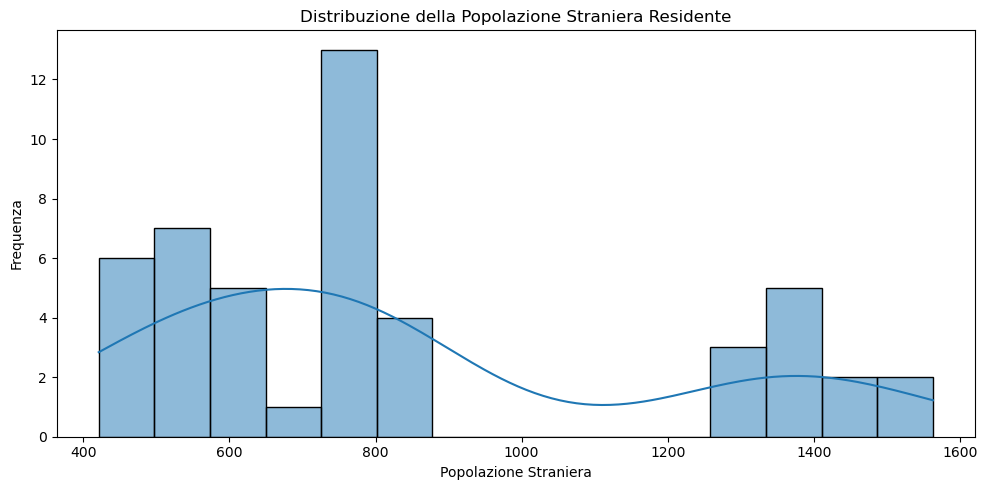

In [12]:
print("\n--- A. Istogramma Popolazione Straniera ---")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='POPOLAZIONE_STRANIERA', kde=True, bins=15)
plt.title('Distribuzione della Popolazione Straniera Residente')
plt.xlabel('Popolazione Straniera')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

### 4.2 Box Plot: Confronto Distribuzioni
I Box Plot (diagrammi a scatola e baffi) sono eccellenti per confrontare la distribuzione di una variabile numerica (`POPOLAZIONE_STRANIERA`) attraverso diverse categorie (`NOME_COM`, `ANNO`). Mostrano mediana, quartili, range interquartile e potenziali outliers.

* **Box Plot per Comune:** Confronta la variabilità della popolazione straniera tra i diversi comuni nel periodo 2011-2016.
* **Box Plot per Anno:** Mostra come la distribuzione della popolazione straniera (considerando tutti i comuni insieme) è cambiata di anno in anno.


--- B. Box Plot Popolazione Straniera per Comune ---


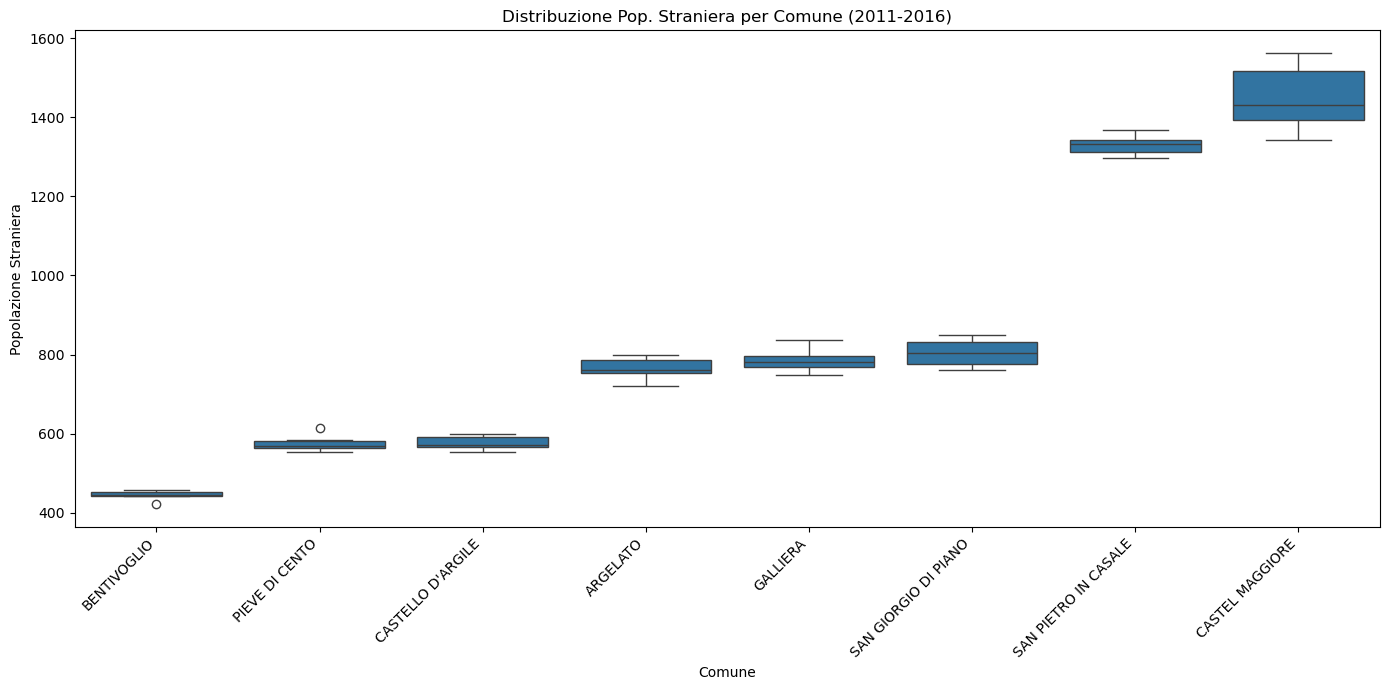

In [14]:
print("\n--- B. Box Plot Popolazione Straniera per Comune ---")
plt.figure(figsize=(14, 7))
try:
    order = df.groupby('NOME_COM')['POPOLAZIONE_STRANIERA'].median().sort_values().index
    sns.boxplot(data=df, x='NOME_COM', y='POPOLAZIONE_STRANIERA', order=order)
except KeyError:
     sns.boxplot(data=df, x='NOME_COM', y='POPOLAZIONE_STRANIERA')
plt.title('Distribuzione Pop. Straniera per Comune (2011-2016)')
plt.xlabel('Comune')
plt.ylabel('Popolazione Straniera')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Andamenti Temporali e Geografici

Approfondiamo come la popolazione straniera varia nello spazio (tra comuni) e nel tempo (negli anni).

### 5.1 Popolazione Straniera Media per Comune (Bar Chart)
Questo grafico a barre confronta il valore medio della popolazione straniera registrata in ciascun comune durante l'intero periodo di osservazione (2011-2016). Evidenzia immediatamente i comuni con presenza media maggiore o minore.


--- C. Box Plot Popolazione Straniera per Anno ---


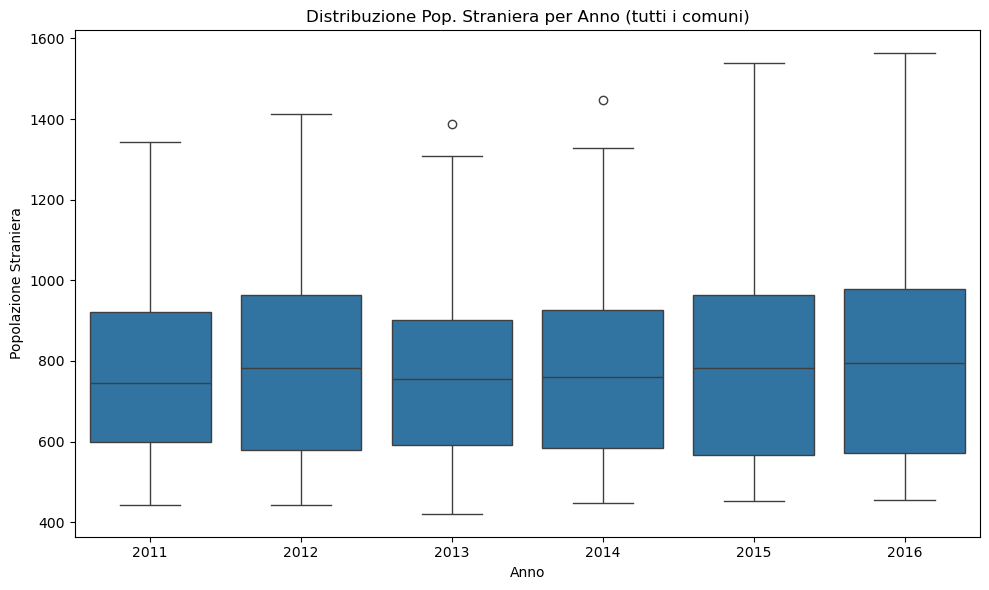

In [16]:
print("\n--- C. Box Plot Popolazione Straniera per Anno ---")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ANNO', y='POPOLAZIONE_STRANIERA')
plt.title('Distribuzione Pop. Straniera per Anno (tutti i comuni)')
plt.xlabel('Anno')
plt.ylabel('Popolazione Straniera')
plt.tight_layout()
plt.show()

### 5.2 Andamento Temporale per Comune (Line Plot)
Questo grafico a linee traccia l'evoluzione della popolazione straniera anno per anno per ogni singolo comune. È fondamentale per identificare tendenze specifiche di crescita, diminuzione o stabilità per ciascuna località.


--- D. Bar Chart Popolazione Straniera Media per Comune ---


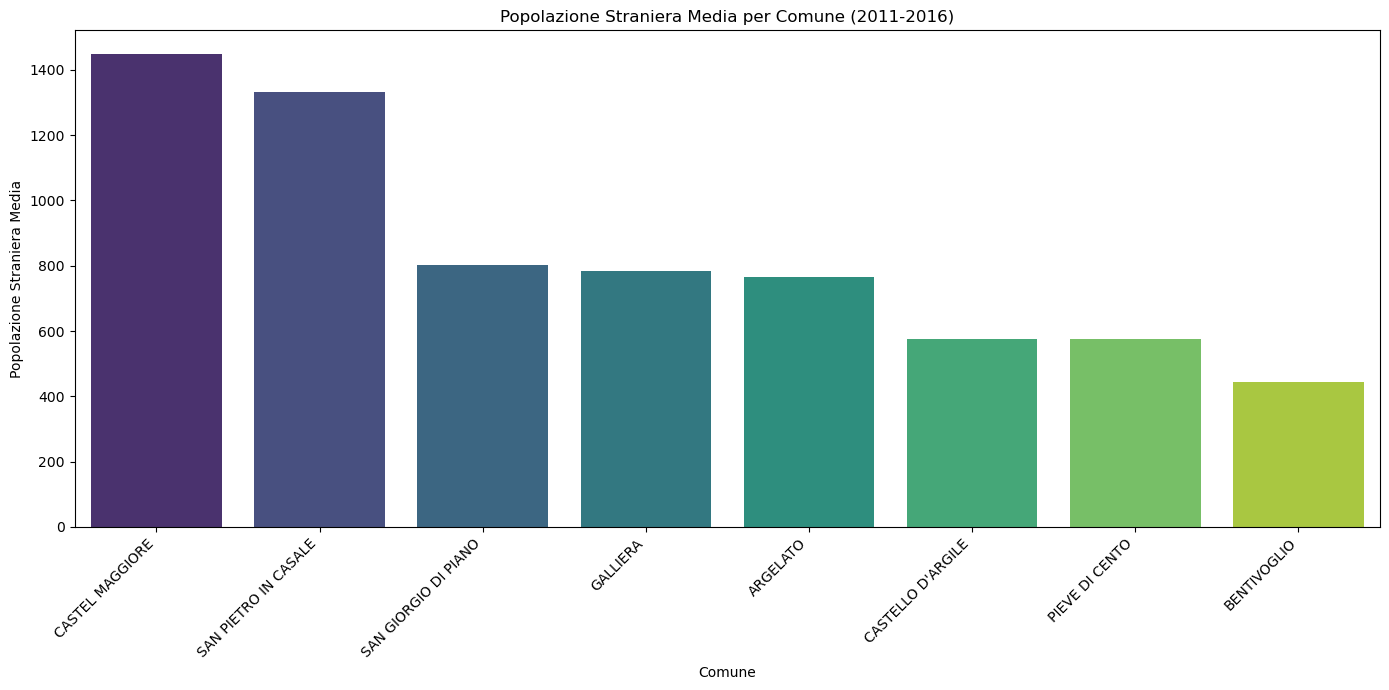

In [51]:
print("\n--- D. Bar Chart Popolazione Straniera Media per Comune ---")
try:
    pop_media_comune = df.groupby('NOME_COM')['POPOLAZIONE_STRANIERA'].mean().reset_index().sort_values('POPOLAZIONE_STRANIERA', ascending=False)
    plt.figure(figsize=(14, 7))
    sns.barplot(data=pop_media_comune, x='NOME_COM', y='POPOLAZIONE_STRANIERA', hue='NOME_COM', palette='viridis', legend=False)
    plt.title('Popolazione Straniera Media per Comune (2011-2016)')
    plt.xlabel('Comune')
    plt.ylabel('Popolazione Straniera Media')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
except KeyError:
    print("Impossibile generare il grafico a barre della popolazione media.")


--- E. Line Plot Andamento Popolazione Straniera per Comune ---


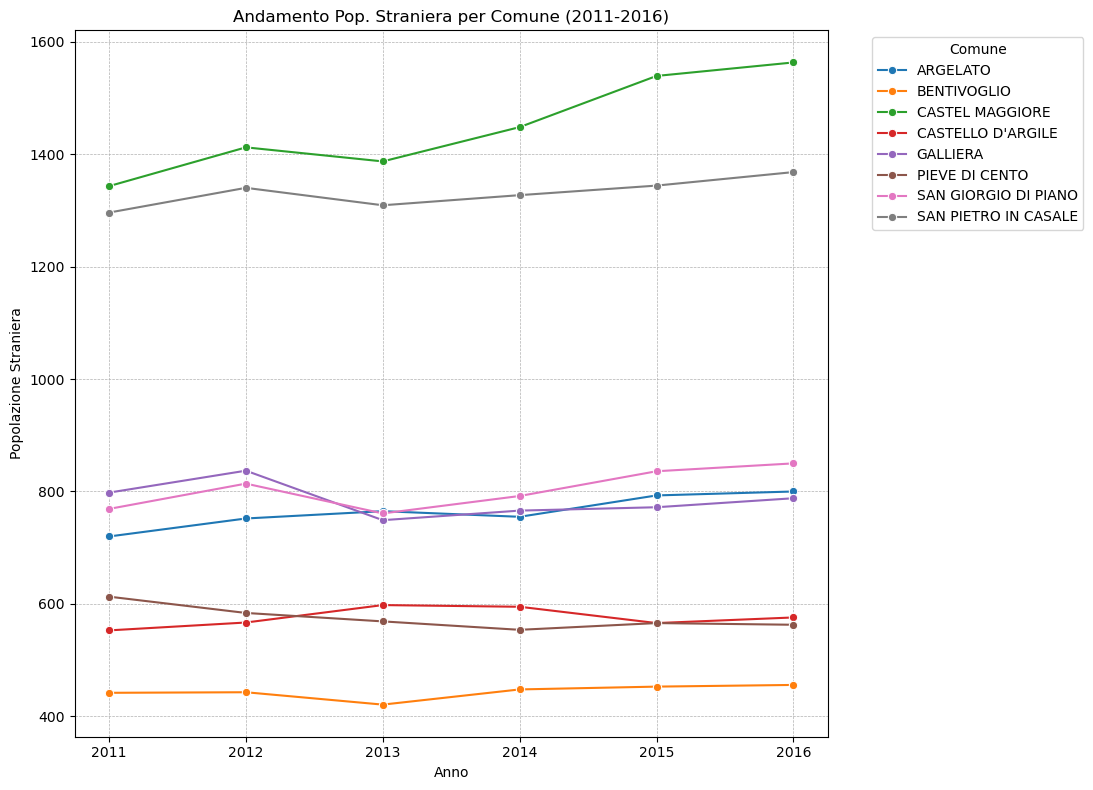

In [19]:
print("\n--- E. Line Plot Andamento Popolazione Straniera per Comune ---")
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='ANNO', y='POPOLAZIONE_STRANIERA', hue='NOME_COM', marker='o', palette='tab10')
plt.title('Andamento Pop. Straniera per Comune (2011-2016)')
plt.xlabel('Anno')
plt.ylabel('Popolazione Straniera')
plt.legend(title='Comune', bbox_to_anchor=(1.05, 1), loc='upper left')
unique_years = sorted(df['ANNO'].dropna().unique().astype(int))
plt.xticks(unique_years)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.80, 1])
plt.show()


--- F. Heatmap Popolazione Straniera per Comune e Anno ---


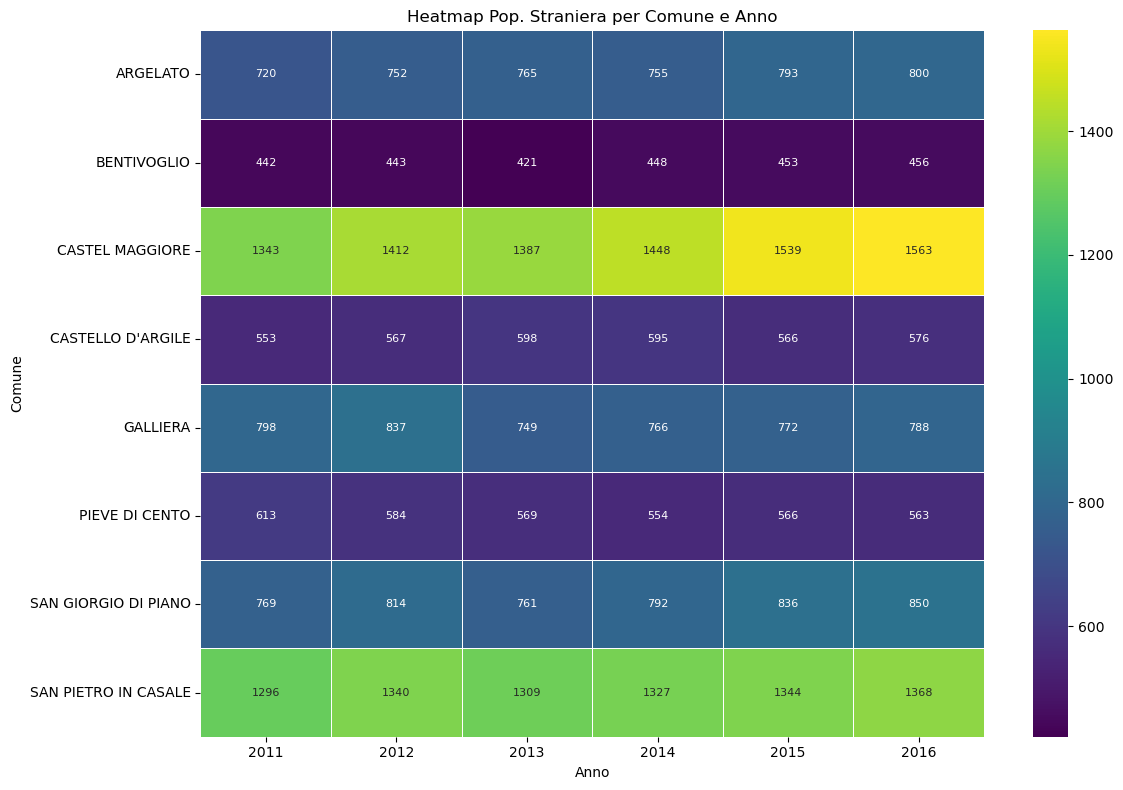

In [20]:
print("\n--- F. Heatmap Popolazione Straniera per Comune e Anno ---")
df_pivot = None # Inizializza a None
try:
    df_pivot = df.pivot_table(index='NOME_COM', columns='ANNO', values='POPOLAZIONE_STRANIERA', aggfunc='mean')
    if df_pivot.isnull().values.any():
        print("Attenzione: Trovati NaN nella tabella pivot. Riempimento con 0...")
        df_pivot.fillna(0, inplace=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, fmt=".0f", linewidths=.5, cmap="viridis", annot_kws={"size": 8})
    plt.title('Heatmap Pop. Straniera per Comune e Anno')
    plt.xlabel('Anno')
    plt.ylabel('Comune')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Errore durante la creazione della heatmap pivot: {e}")

### 5.2 Andamento Temporale per Comune (Line Plot)
Questo grafico a linee traccia l'evoluzione della popolazione straniera anno per anno per ogni singolo comune. È fondamentale per identificare tendenze specifiche di crescita, diminuzione o stabilità per ciascuna località.


--- G. Andamento Rapporto Maschi/Femmine Stranieri ---


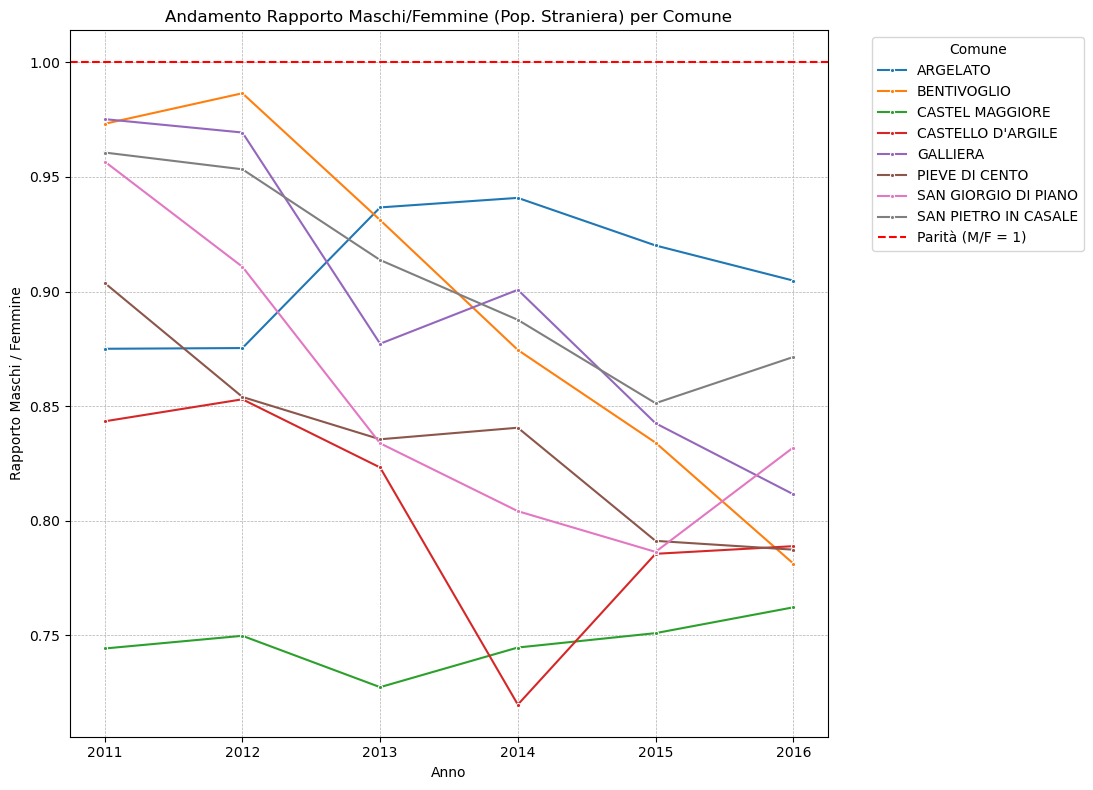

,count,mean,std,min,25%,50%,75%,max
NOME_COM,,,,,,,,
ARGELATO,6.0,0.908792,0.029036,0.875000,0.882674,0.912429,0.932556,0.940874
BENTIVOGLIO,6.0,0.896782,0.081080,0.781250,0.844125,0.902835,0.962709,0.986547
CASTEL MAGGIORE,6.0,0.746445,0.011419,0.727273,0.744261,0.747134,0.750562,0.762120
CASTELLO D'ARGILE,6.0,0.802235,0.048946,0.719653,0.786322,0.805995,0.838293,0.852941
GALLIERA,6.0,0.896096,0.066409,0.811494,0.851160,0.888969,0.952245,0.975248
PIEVE DI CENTO,6.0,0.835359,0.043156,0.787302,0.802225,0.838008,0.850609,0.903727
SAN GIORGIO DI PIANO,6.0,0.853933,0.065956,0.786325,0.811049,0.832816,0.891532,0.956743
SAN PIETRO IN CASALE,6.0,0.906339,0.044323,0.851240,0.875463,0.900684,0.943450,0.960666


In [22]:
print("\n--- G. Andamento Rapporto Maschi/Femmine Stranieri ---")
# Calcola il rapporto M/F
df['RAPPORTO_M_F'] = df.apply(lambda row: row['MASCHI'] / row['FEMMINE'] if row['FEMMINE'] > 0 else np.nan, axis=1)

plt.figure(figsize=(14, 8))
sns.lineplot(data=df.dropna(subset=['RAPPORTO_M_F']), x='ANNO', y='RAPPORTO_M_F', hue='NOME_COM', marker='.', palette='tab10')
plt.axhline(1, color='red', linestyle='--', label='Parità (M/F = 1)')
plt.title('Andamento Rapporto Maschi/Femmine (Pop. Straniera) per Comune')
plt.xlabel('Anno')
plt.ylabel('Rapporto Maschi / Femmine')
plt.legend(title='Comune', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(unique_years) # Riutilizza unique_years dalla cella precedente
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.80, 1])
plt.show()

# Mostra statistiche del rapporto M/F
display(df[['NOME_COM', 'ANNO', 'RAPPORTO_M_F']].groupby('NOME_COM')['RAPPORTO_M_F'].describe())

### 6.2 Analisi delle Nazionalità Principali
Esaminiamo i dati relativi agli stati di provenienza:
* Identifichiamo quali sono le nazionalità più rappresentate (considerando il primo stato di provenienza dichiarato).
* Visualizziamo come l'incidenza percentuale della prima nazionalità sulla popolazione straniera totale varia nel tempo per ciascun comune.


--- H. Analisi Prime Nazionalità ---
Nazionalità più Frequenti come 1° Stato (Conteggio Occorrenze 2011-2016):


,Conteggio
1_STATO_DI_PROVENIENZA,
ROMANIA,29
MAROCCO,19


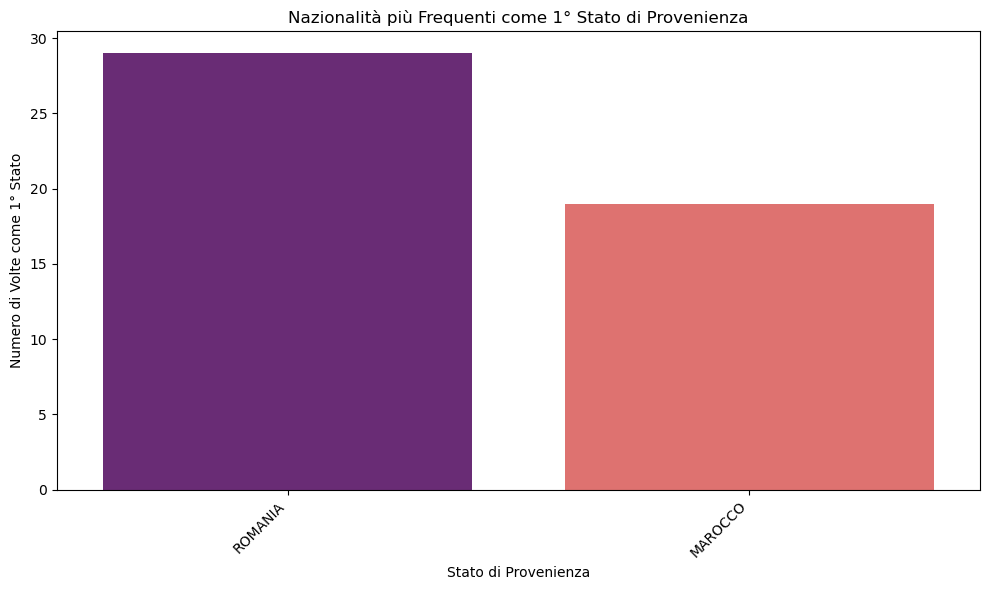

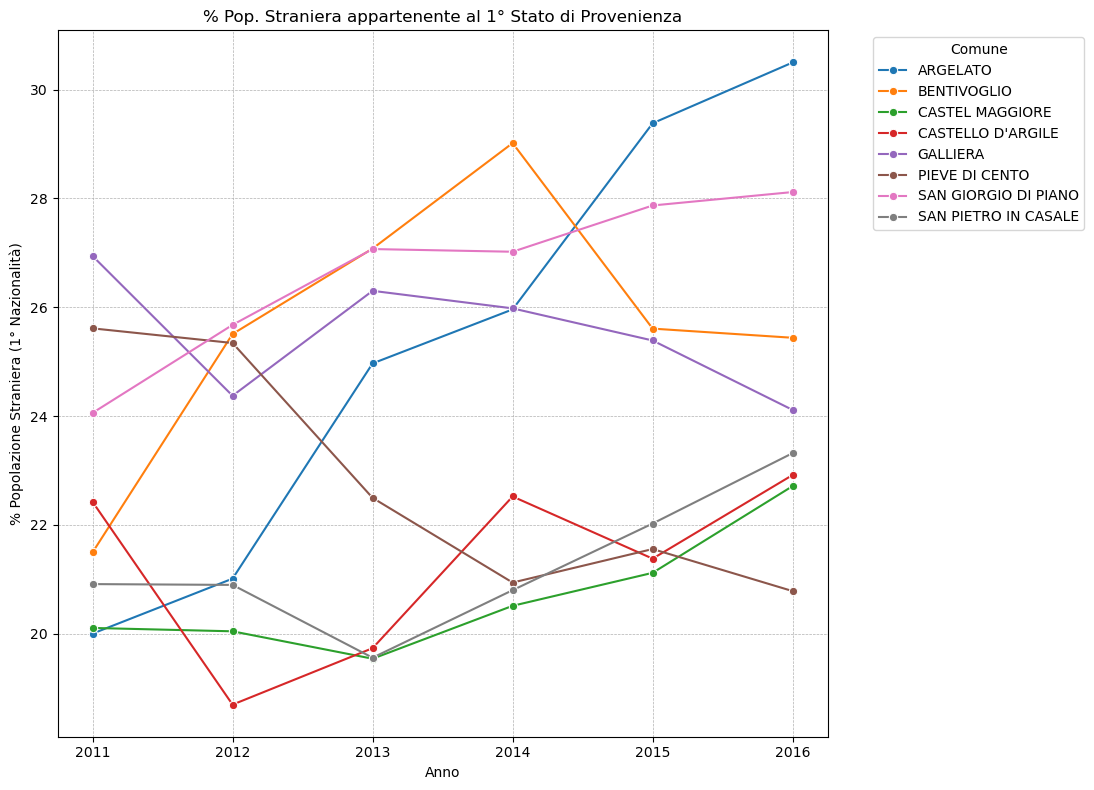

In [49]:
print("\n--- H. Analisi Prime Nazionalità ---")
try:
    # Nazionalità più frequenti come 1° stato
    if df['1_STATO_DI_PROVENIENZA'].notna().any():
        top_naz1 = df['1_STATO_DI_PROVENIENZA'].value_counts()
        print("Nazionalità più Frequenti come 1° Stato (Conteggio Occorrenze 2011-2016):")
        display(top_naz1.to_frame(name='Conteggio')) # Mostra come tabella

        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_naz1.index, y=top_naz1.values, hue=top_naz1.index, palette='magma', legend=False) # Aggiunto hue=top_naz1.index e legend=False
        plt.title('Nazionalità più Frequenti come 1° Stato di Provenienza')
        plt.xlabel('Stato di Provenienza')
        plt.ylabel('Numero di Volte come 1° Stato')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Colonna '1_STATO_DI_PROVENIENZA' vuota o con solo NaN.")

    # % della prima nazionalità sulla popolazione straniera totale
    df['PERC_NAZ_1'] = df.apply(lambda row: (row['N_1_STATO_DI_PROV'] / row['POPOLAZIONE_STRANIERA']) * 100
                                           if row['POPOLAZIONE_STRANIERA'] > 0 else np.nan, axis=1)

    if df['PERC_NAZ_1'].notna().any():
        plt.figure(figsize=(14, 8))
        sns.lineplot(data=df.dropna(subset=['PERC_NAZ_1']), x='ANNO', y='PERC_NAZ_1', hue='NOME_COM', marker='o', palette='tab10')
        plt.title('% Pop. Straniera appartenente al 1° Stato di Provenienza')
        plt.xlabel('Anno')
        plt.ylabel('% Popolazione Straniera (1° Nazionalità)')
        plt.legend(title='Comune', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(unique_years)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout(rect=[0, 0, 0.80, 1])
        plt.show()
    else:
         print("Impossibile calcolare la percentuale della prima nazionalità.")

except KeyError as e:
    print(f"Errore durante l'analisi delle nazionalità: Colonna {e} mancante.")

### 6.3 Tecniche Avanzate: PCA e Coordinate Parallele

Utilizziamo due tecniche per esplorare relazioni multidimensionali nei dati degli andamenti annuali.

* **Principal Component Analysis (PCA):** La PCA è una tecnica di riduzione dimensionale. La applichiamo considerando ogni anno come una "dimensione" per ciascun comune. L'obiettivo è vedere se i comuni possono essere raggruppati in base a similarità nei loro andamenti complessivi di popolazione straniera, proiettandoli su un grafico a 2 dimensioni (i primi due Componenti Principali) che catturano la maggior parte della varianza originale.
* **Coordinate Parallele:** Questo grafico permette di visualizzare simultaneamente l'andamento della popolazione straniera per *tutti* i comuni attraverso gli anni. Ogni comune è una linea, e gli assi verticali paralleli rappresentano gli anni. È utile per confrontare "profili" di andamento.


--- I. Principal Component Analysis (PCA) ---
Applicazione PCA sulla tabella Popolazione Straniera (Comune x Anno):
Varianza spiegata: [0.99584005 0.00288645]


,PC 1,PC 2
NOME_COM,,
ARGELATO,-0.557985,-0.106198
BENTIVOGLIO,-2.869890,-0.090433
CASTEL MAGGIORE,4.375194,-0.173890
CASTELLO D'ARGILE,-1.911540,-0.051366
GALLIERA,-0.394879,0.189569


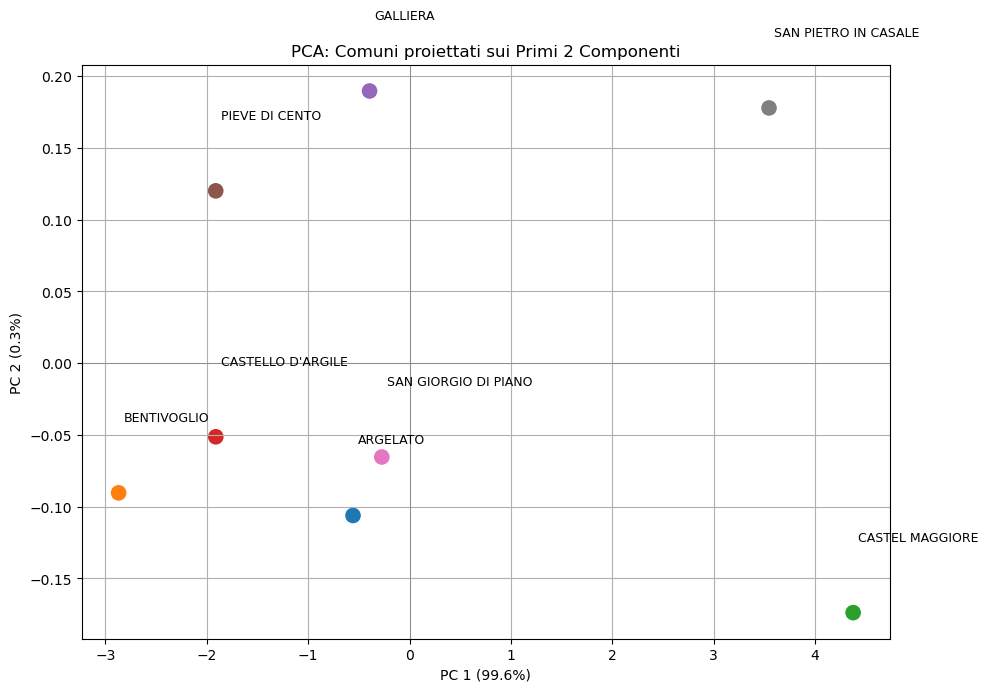

In [26]:
print("\n--- I. Principal Component Analysis (PCA) ---")
# Assicurati che df_pivot sia stato creato correttamente nella cella della heatmap
if df_pivot is not None and isinstance(df_pivot, pd.DataFrame) and not df_pivot.isnull().values.any():
    print("Applicazione PCA sulla tabella Popolazione Straniera (Comune x Anno):")
    try:
        scaler = StandardScaler()
        df_pivot_numeric = df_pivot.select_dtypes(include=np.number)
        scaled_data = scaler.fit_transform(df_pivot_numeric)

        n_components = min(2, scaled_data.shape[1])
        if n_components < 1:
             print("PCA non applicabile: meno di 1 colonna numerica.")
        else:
            pca = PCA(n_components=n_components)
            principal_components = pca.fit_transform(scaled_data)

            pca_df = pd.DataFrame(data = principal_components,
                                  columns = [f'PC {i+1}' for i in range(n_components)],
                                  index = df_pivot_numeric.index)

            print(f"Varianza spiegata: {pca.explained_variance_ratio_}")
            display(pca_df.head()) # Mostra i componenti principali

            plt.figure(figsize=(10, 7))
            sns.scatterplot(x='PC 1', y=f'PC {n_components}', data=pca_df, s=150, hue=pca_df.index, legend=False)
            for i, comune in enumerate(pca_df.index):
                 plt.text(pca_df.iloc[i, 0]+0.05, pca_df.iloc[i, n_components-1]+0.05, comune, fontsize=9)
            plt.title(f'PCA: Comuni proiettati sui Primi {n_components} Componenti')
            plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
            if n_components > 1: plt.ylabel(f'PC {n_components} ({pca.explained_variance_ratio_[n_components-1]*100:.1f}%)')
            plt.grid(True)
            plt.axhline(0, color='grey', lw=0.5)
            plt.axvline(0, color='grey', lw=0.5)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Errore durante PCA: {e}")

elif df_pivot is not None and df_pivot.isnull().values.any():
    print("Impossibile eseguire PCA su df_pivot perché contiene valori NaN.")
else:
     print("df_pivot non definito o non valido, impossibile eseguire PCA.")


--- J. Coordinate Parallele ---


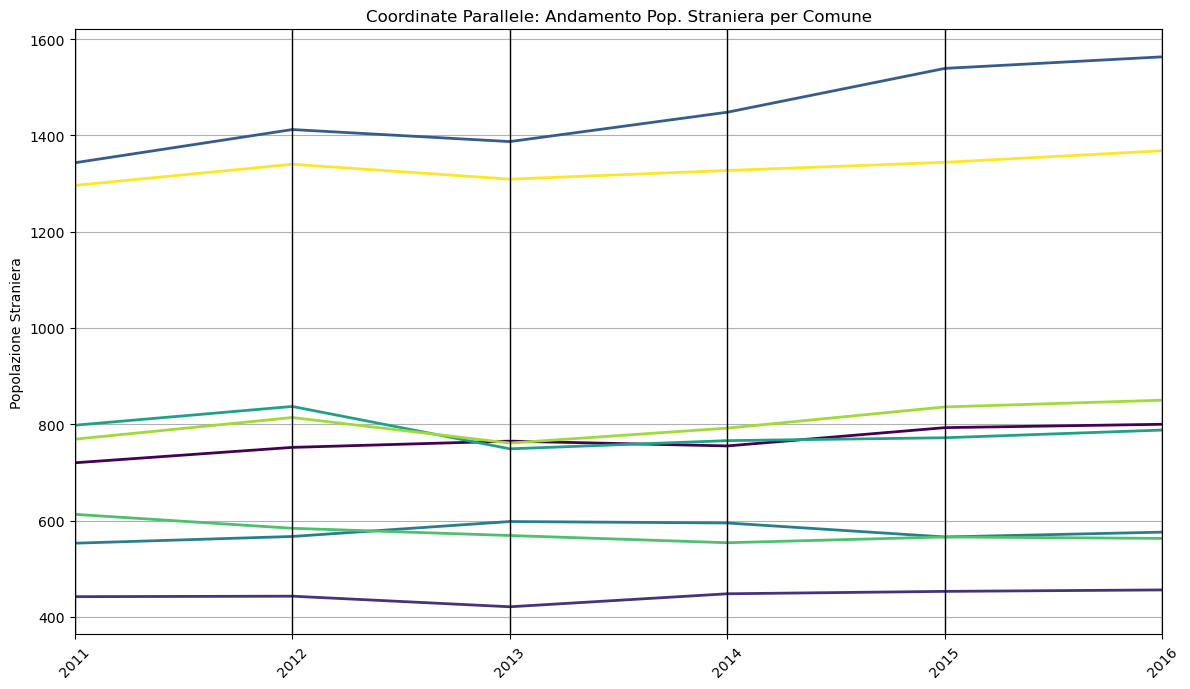


--- Fine Analisi ---


In [28]:
print("\n--- J. Coordinate Parallele ---")
if df_pivot is not None and isinstance(df_pivot, pd.DataFrame) and not df_pivot.empty:
     try:
        df_pivot_numeric = df_pivot.select_dtypes(include=np.number)
        if not df_pivot_numeric.empty:
            df_parallel = df_pivot_numeric.reset_index()
            plt.figure(figsize=(12, 7))
            pd.plotting.parallel_coordinates(df_parallel, 'NOME_COM', colormap='viridis', linewidth=2)
            plt.title('Coordinate Parallele: Andamento Pop. Straniera per Comune')
            plt.xticks(rotation=45)
            plt.ylabel('Popolazione Straniera')
            plt.legend().remove()
            plt.grid(True, axis='y')
            plt.tight_layout()
            plt.show()
        else:
            print("Nessuna colonna numerica in df_pivot per le coordinate parallele.")
     except Exception as e:
        print(f"Errore durante la creazione delle coordinate parallele: {e}")
else:
    print("df_pivot non disponibile o vuoto, impossibile generare coordinate parallele.")

print("\n--- Fine Analisi ---")

## 7. Conclusioni Preliminari e Discussione

Questa analisi esplorativa ha permesso di evidenziare diversi aspetti chiave riguardanti la popolazione straniera nell'Unione Reno Galliera tra il 2011 e il 2016.

**Principali Osservazioni (da compilare/adattare in base ai risultati effettivi):**

* **Andamento Generale:** [Descrivere se la tendenza generale è di crescita, calo o stabilità nella popolazione straniera totale dell'area].
* **Differenze Comunali:** [Menzionare i comuni con la popolazione straniera media/massima più alta/bassa e quelli con le tendenze di crescita/calo più marcate. Es: "Castel Maggiore e San Pietro in Casale mostrano costantemente i numeri più alti, mentre Bentivoglio ha i valori più bassi."].
* **Distribuzione:** [Commentare la forma della distribuzione vista nell'istogramma e nei box plot. Es: "La distribuzione appare [simmetrica/asimmetrica], con la maggior parte dei valori concentrati sotto quota X."].
* **Composizione di Genere:** [Riassumere le tendenze del rapporto M/F. Es: "Si osserva una generale [prevalenza maschile/femminile/tendenza alla parità], con differenze significative in comuni come Y e Z."].
* **Nazionalità:** [Indicare le nazionalità dominanti (es. Romania, Marocco) e se la loro incidenza è cambiata nel tempo. Es: "La Romania è la prima nazionalità in diversi comuni, con un'incidenza in crescita, mentre il Marocco, pur importante, mostra una tendenza [stabile/in calo] in alcuni contesti."].
* **Pattern Complessivi (PCA):** [Interpretare il grafico PCA. Es: "La PCA suggerisce che i comuni [A, B] hanno avuto andamenti molto simili tra loro e distinti da [C, D], forse indicando dinamiche socio-economiche differenti."].

**Spunti per la Discussione:**

* Quali fattori locali (economici, sociali, abitativi) potrebbero spiegare le differenze osservate tra i comuni?
* I trend osservati sono in linea con le tendenze regionali o nazionali nello stesso periodo?
* Ci sono risultati inaspettati che meritano un approfondimento?
* Quali potrebbero essere i passi successivi per questa analisi (es. incrocio con altri dati, analisi statistiche più formali)?

*(Questo spazio è pensato per raccogliere le interpretazioni finali e stimolare la riflessione sui dati analizzati).*